## loan approval modeling

 Synthetic Dataset for Risk Assessment and Loan Approval Modeling
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

* Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

* Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('Loan (2).csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [9]:
df.shape

(20000, 36)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [11]:
df.describe(include='O').T

,count,unique,top,freq
ApplicationDate,20000,20000,2018-01-01,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


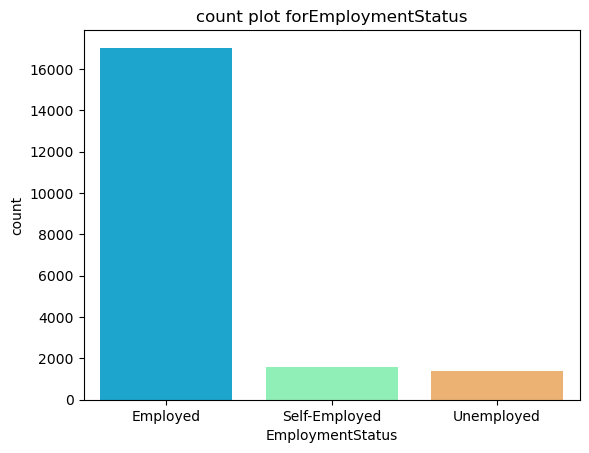

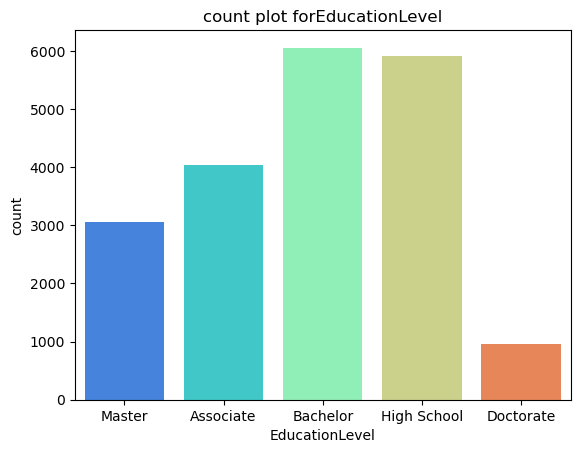

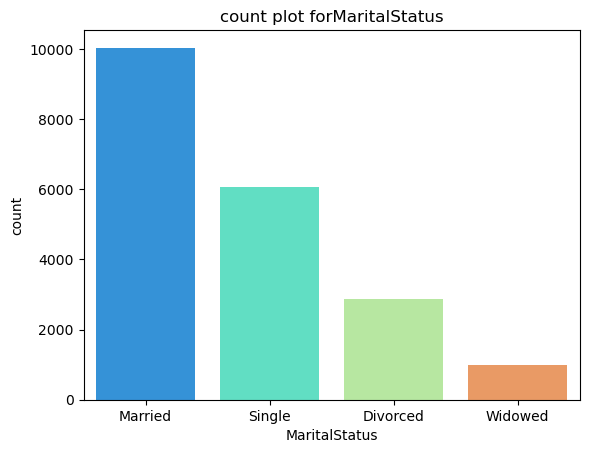

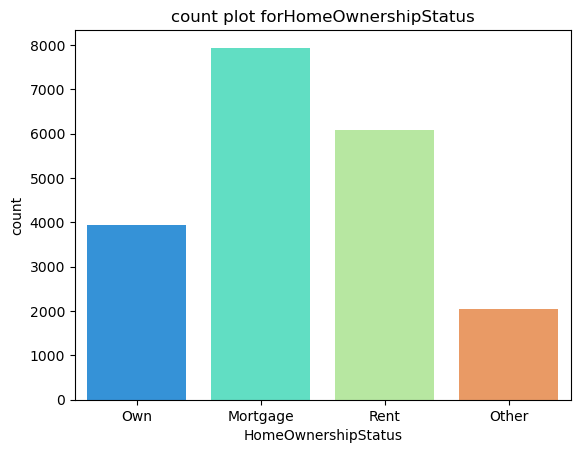

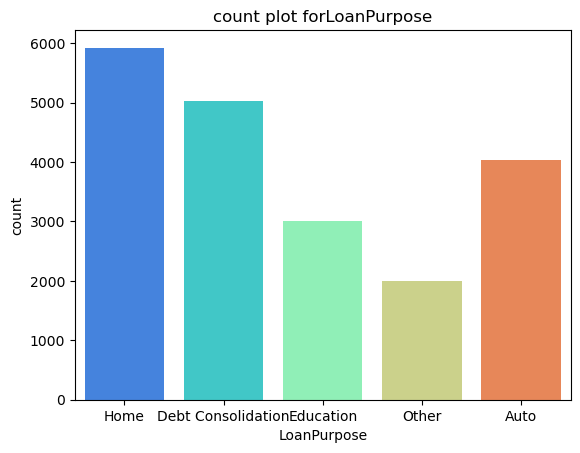

In [ ]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]:
     #skip the first feature
    plt.Figure(figsize=(6,6))
    sns.countplot(data=df,x=col,hue=col,palette='rainbow')
    plt.title(f"count plot for{col}")
    plt.show()

most of the loan needed persons are

* employed
* married
* comparatively less educated
* need loan for building home

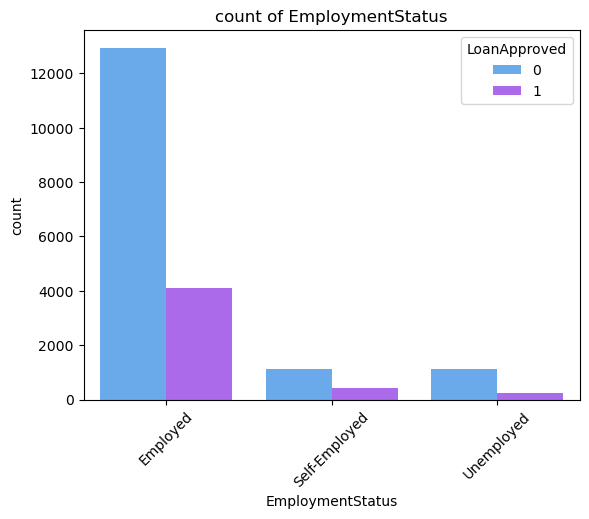

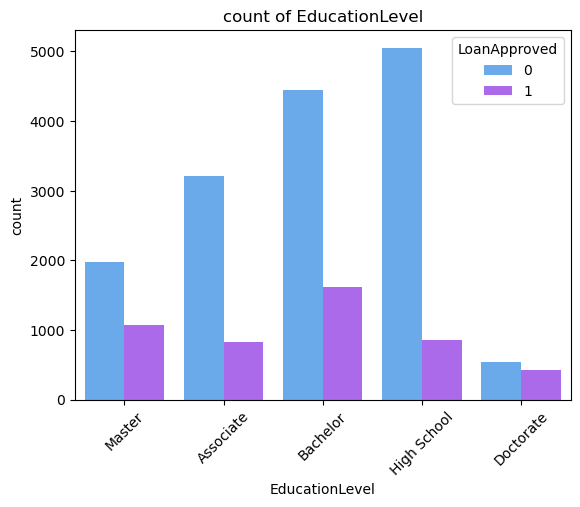

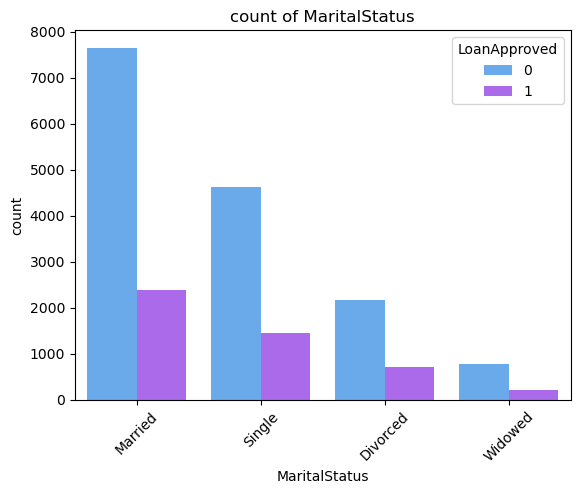

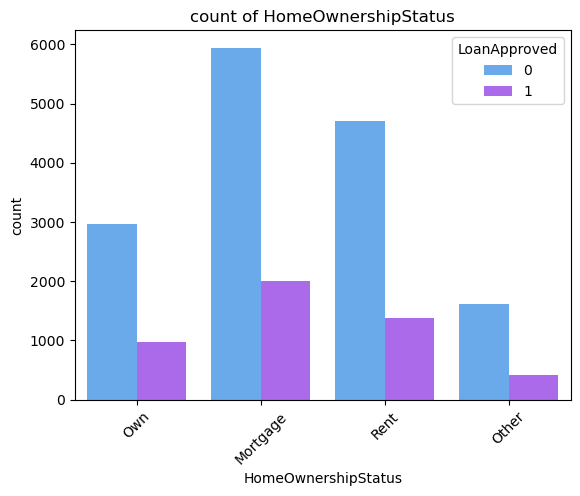

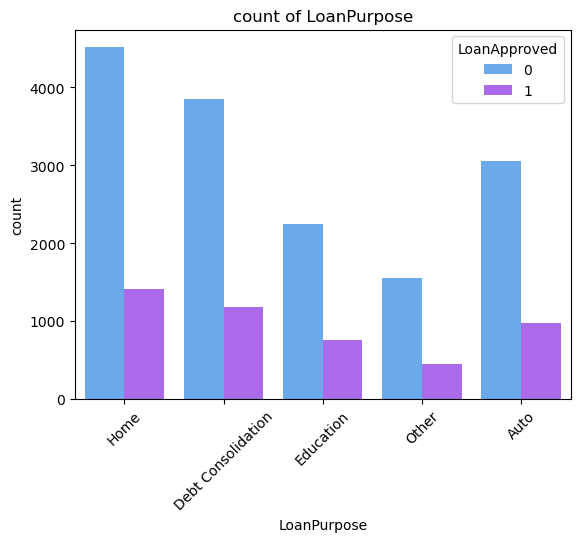

In [13]:
# plot countplots for each categorical column 
for col in categorical_columns[1:]: # skip the first feature
    plt.Figure(figsize=(3,4))
    sns.countplot(data=df,x=col,palette='cool',hue='LoanApproved')
    plt.title(f"count of {col}")
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation = 45)
    plt.show()

majority of loan requests are rejected in all categories(there might be some other reason affecting the riskscore)

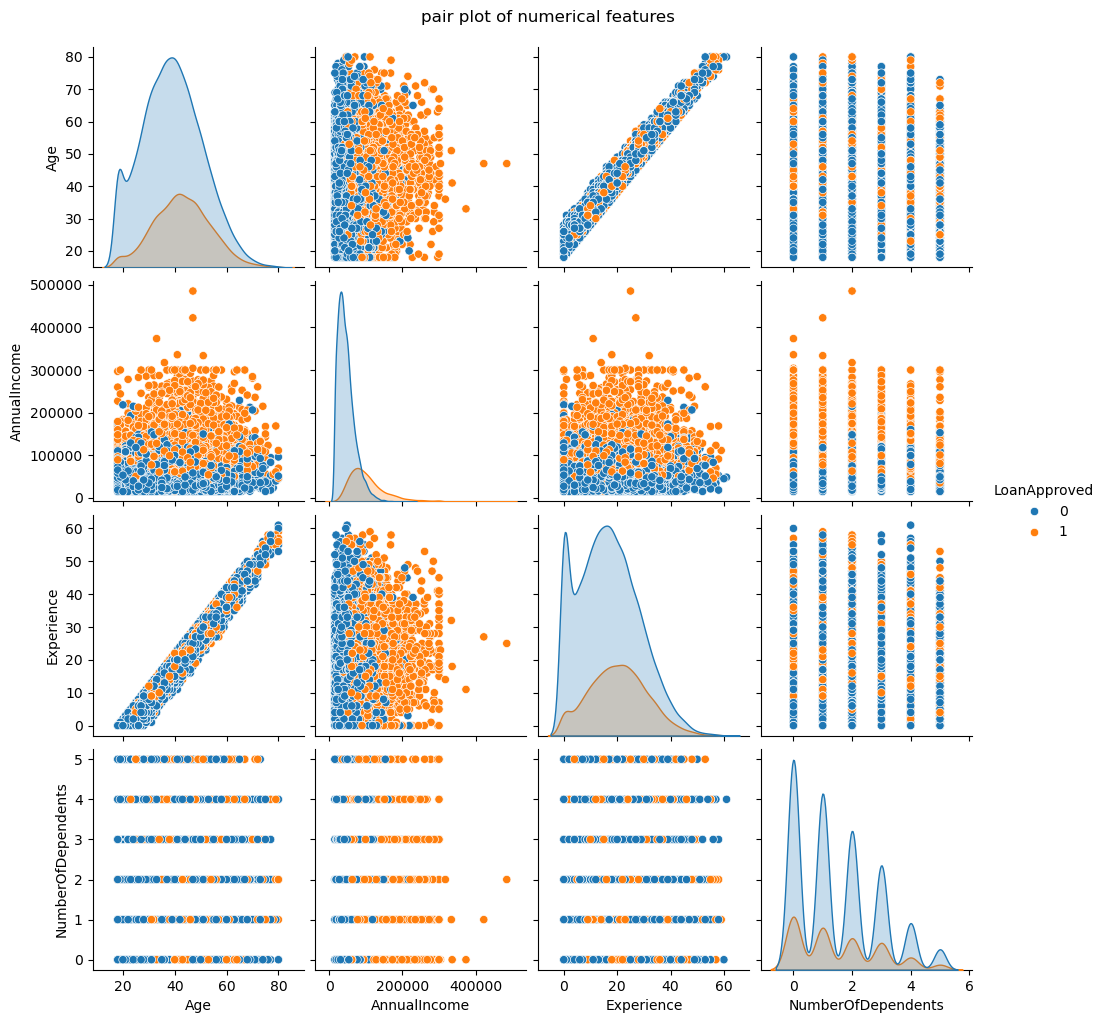

In [14]:
# multivarite analysis: pair plot of numerical features(personal datails)
sns.pairplot(df[['Age','AnnualIncome','Experience','NumberOfDependents','LoanApproved']],hue='LoanApproved')
plt.suptitle('pair plot of numerical features',y = 1.02)
plt.show()

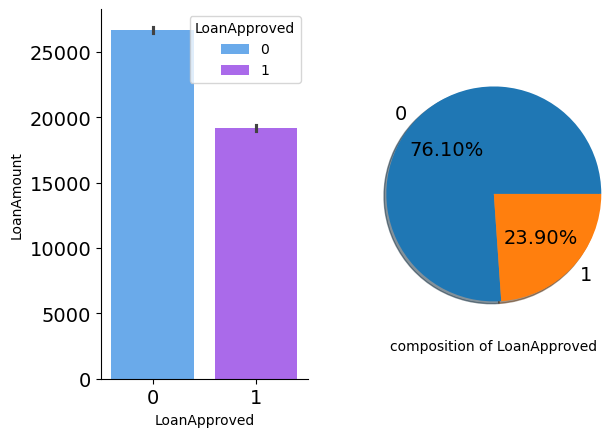

In [15]:
# checking the target
plt.Figure(figsize=(14,7))
# bar plot
ax1 = plt.subplot(1,2,1)
cp = sns.barplot(x='LoanApproved',y = 'LoanAmount',data = df,palette='cool',hue='LoanApproved')
ax1.set_xlabel('LoanApproved')
ax1.set_ylabel('LoanAmount')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)


# pie plot 
ax2 = plt.subplot(1,2,2)
plt.pie(x=df['LoanApproved'].value_counts(),labels=list(df['LoanApproved'].unique()),autopct='%2.2f%%',pctdistance=0.6,shadow=True,radius=1.3,textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('composition of LoanApproved',fontsize = 10,labelpad=30)
plt.subplots_adjust(wspace=0.4)
plt.show()

## data cleaning

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum().sum()

0

## feature engineering

In [19]:
df['BankBalance']=df['SavingsAccountBalance']+df['CheckingAccountBalance']
df.drop('SavingsAccountBalance',axis = 1,inplace=True)
df.drop('CheckingAccountBalance',axis=1,inplace=True)


Text(0.5, 0, 'composition of AgeGroup')

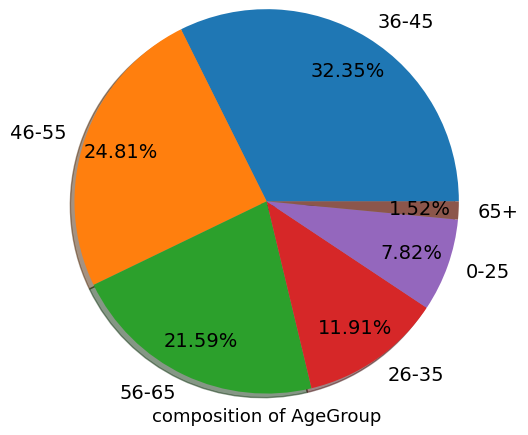

In [20]:
# age binning
df['AgeGroup'] = pd.cut(df['Age'],bins=[0,25,35,45,55,65,100],labels=['0-25','26-35','36-45','46-55','56-65','65+'])
plt.pie(x=df['AgeGroup'].value_counts(),labels=list(df['AgeGroup'].unique()),autopct='%2.2f%%',pctdistance=0.8,shadow=True,radius=1.3,textprops={'fontsize':14})
plt.xlabel('composition of AgeGroup',fontsize=13,labelpad=15)

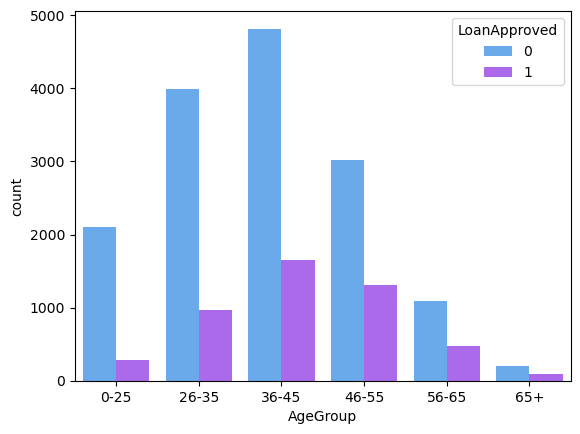

In [21]:
sns.countplot(data=df,x='AgeGroup',hue='LoanApproved',palette='cool')
plt.show()

In [22]:
df.drop('AgeGroup',axis=1,inplace=True)

In [23]:
df[['year','month','day']] = df['ApplicationDate'].str.split('-',expand=True)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
df[['ApplicationDate','year','month','day']]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [24]:
df.drop(['ApplicationDate','year','month','day'],axis=1,inplace=True)

## encoding

In [25]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
print('categorical columns:',categorical_columns)

categorical columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


## ordinal data 
many machine learning models,like decision trees and regression models rely on the relative order of numeric values.by manully assigning meaningful numbers the model can be better capture the relationship between the ordinal categories

## find unique values

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

## ordinal encoding

In [28]:
encodelev=['Employed', 'Self-Employed', 'Unemployed']
encoder=OrdinalEncoder(categories=encodelev)
df['EmploymentStatus'] =df['EmploymentStatus'].map({'Unemployed':0,'Self-Employed':1,'Employed':2})
df['EmploymentStatus'].unique()

array([2, 1, 0], dtype=int64)

In [29]:
df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [30]:
encodeleve=['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate']
encode=OrdinalEncoder(categories=encodeleve)
df['EducationLevel']=df['EducationLevel'].map({'Master':0,'Associate':1,'Bachelor':3,'High school':4,'Doctorate':5})

In [31]:
df['EducationLevel'].unique()

array([ 0.,  1.,  3., nan,  5.])

## label encoding

In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [34]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64

In [35]:
le = LabelEncoder()
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['MaritalStatus'].unique()

array([1, 2, 0, 3])

In [36]:
df['MaritalStatus'].value_counts()

MaritalStatus
1    10041
2     6078
0     2882
3      999
Name: count, dtype: int64

In [37]:
df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [38]:
df['LoanApproved']=le.fit_transform(df['LoanApproved'])
df['LoanApproved'].unique()

array([0, 1], dtype=int64)

In [39]:
df['HomeOwnershipStatus'].value_counts()

HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64

In [40]:
df['HomeOwnershipStatus']=le.fit_transform(df['HomeOwnershipStatus'])
df['HomeOwnershipStatus'].unique()

array([2, 0, 3, 1])

In [41]:
df['LoanPurpose'].value_counts()

LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64

In [42]:
df['LoanPurpose']=le.fit_transform(df['LoanPurpose'])
df['LoanPurpose'].unique()

array([3, 1, 2, 4, 0])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              14092 non-null  float64
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int32  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int32  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## skewed data 

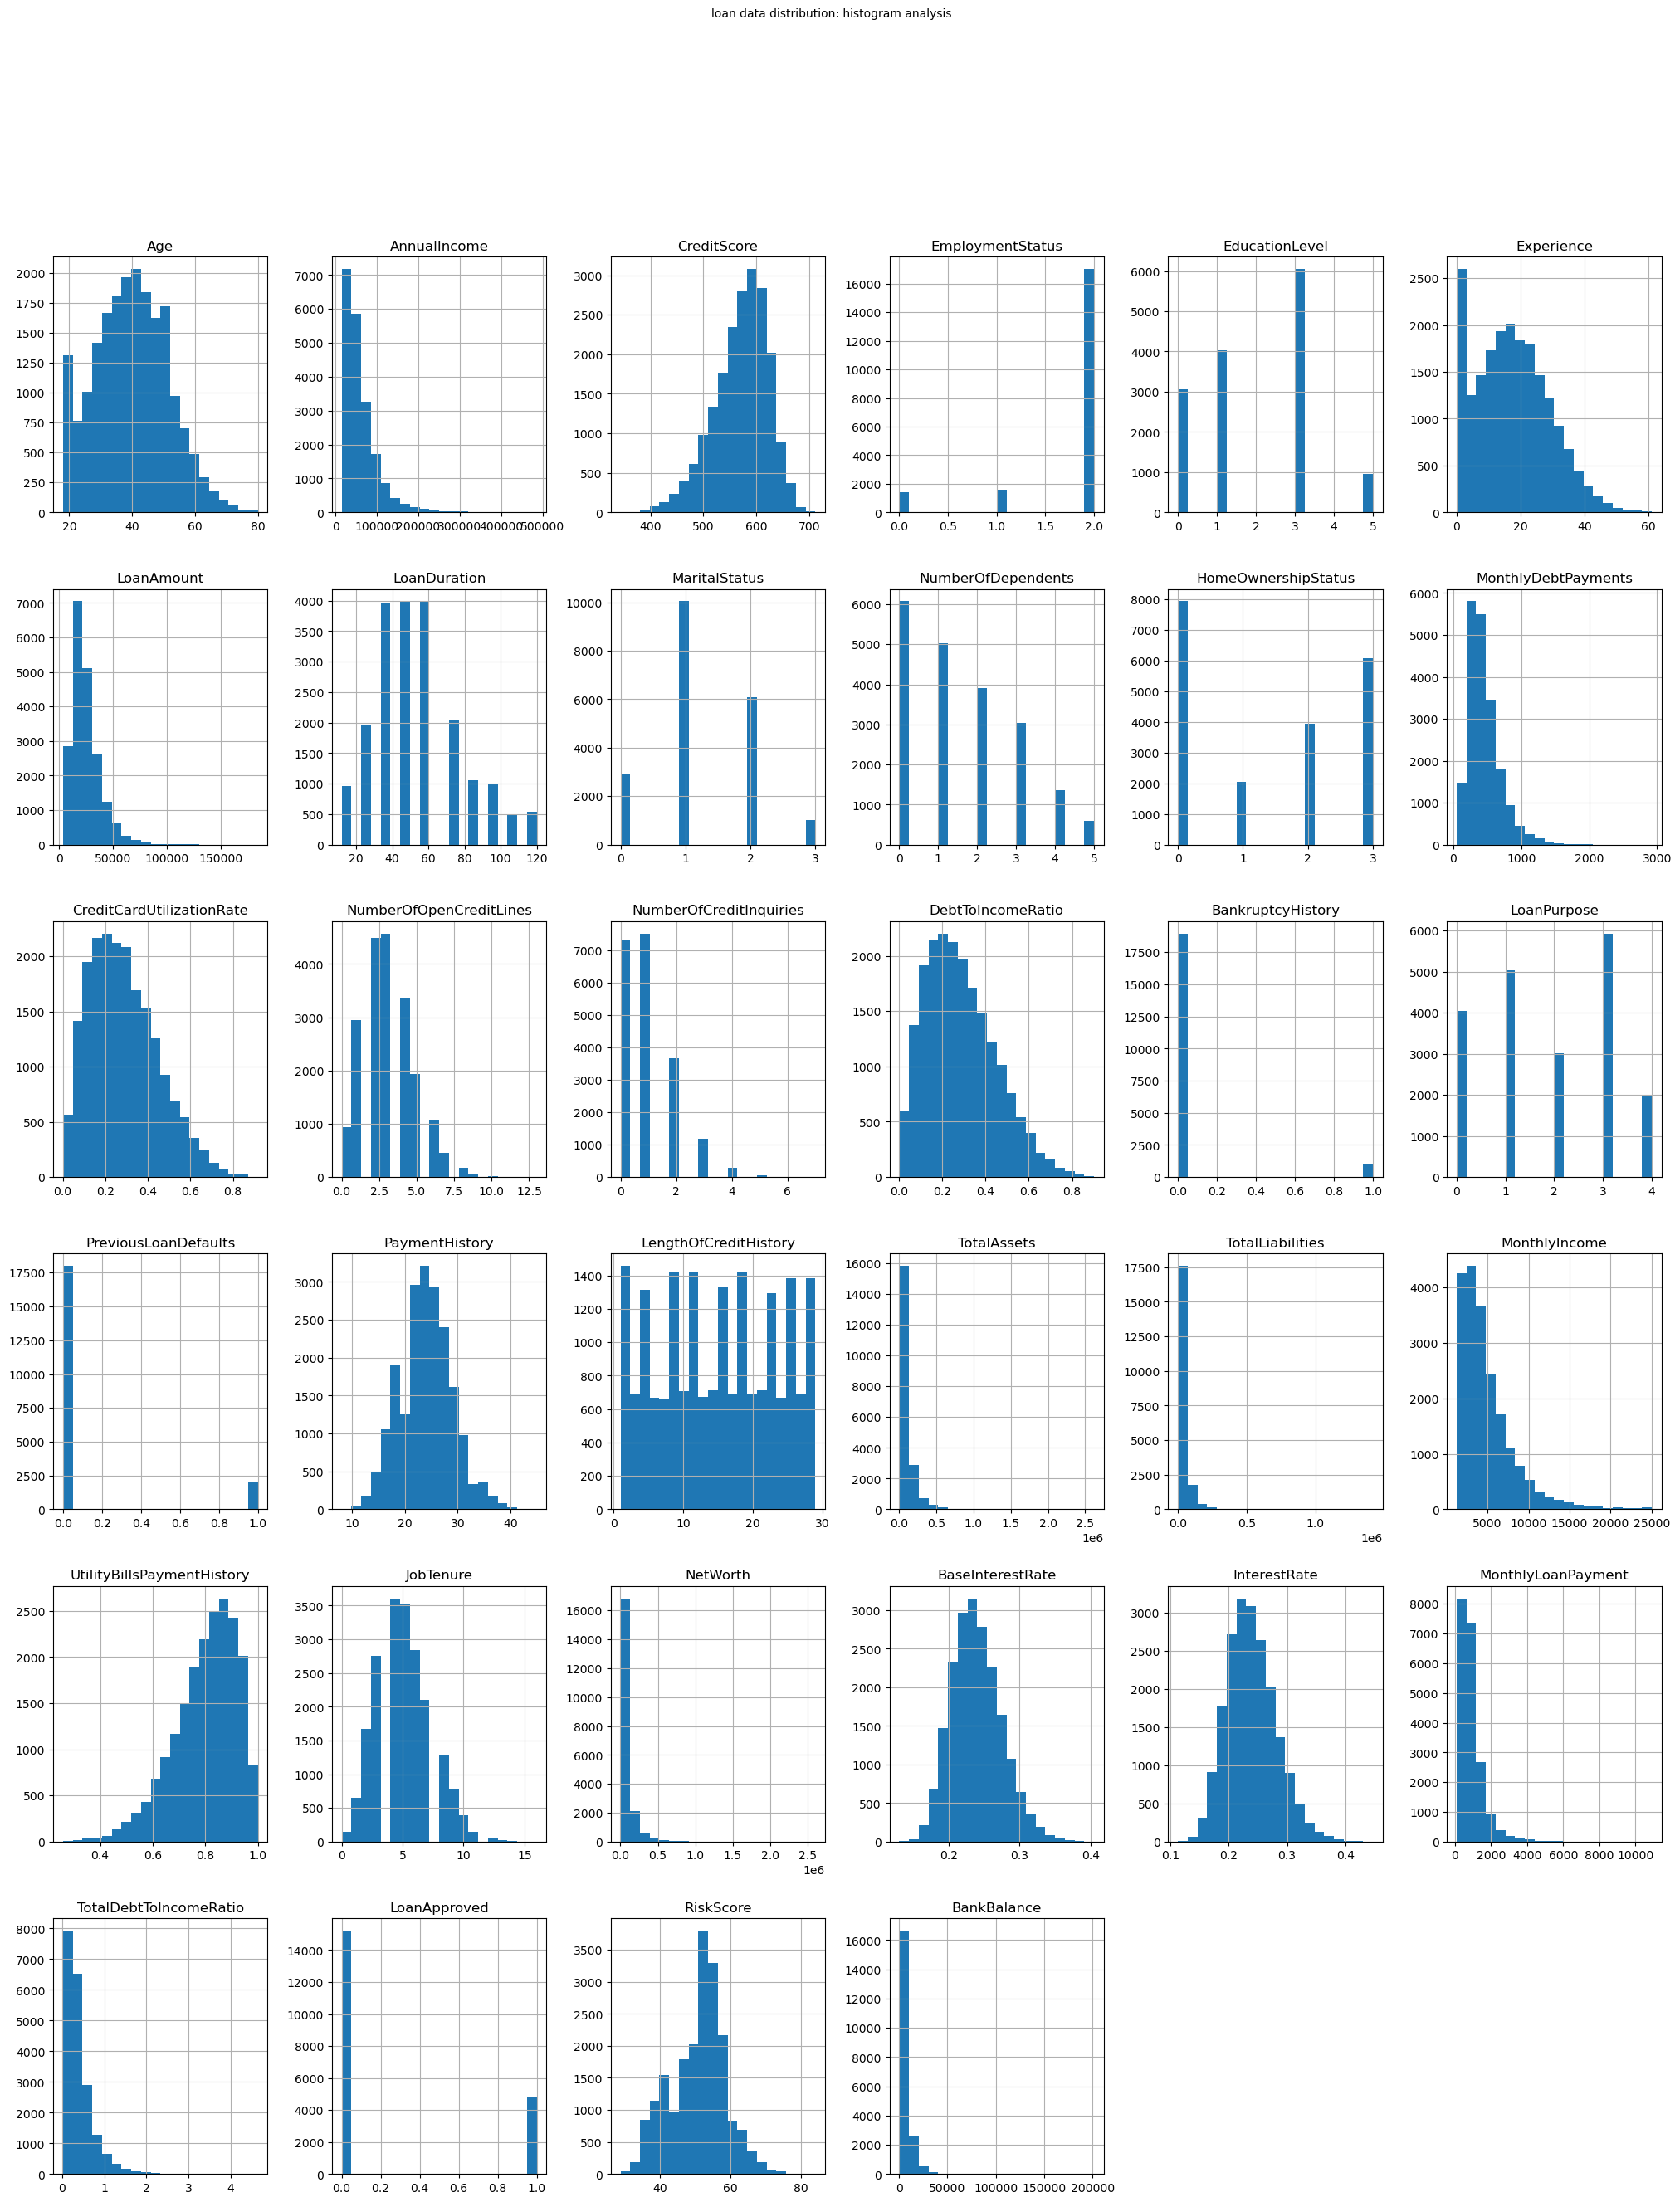

In [44]:
# histogram 
df.hist(bins=20,figsize=(25,30))
plt.suptitle('loan data distribution: histogram analysis',fontsize = 10)
plt.show()

In [45]:
# calculate skewness for each column 
skewness = df.skew()

# sort the skewness value in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Display the total skewness values 
print(sorted_skewness)

EmploymentStatus             -2.455244
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
MaritalStatus                 0.202967
PaymentHistory                0.213465
EducationLevel                0.250005
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

In [46]:
# create a copy of the original data for comparison 
df_copy = df.copy()

# log transformation of skewed columns (eg Annualincome,loanamount)
df['AnnualIncome'] = np.log1p(df['AnnualIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])

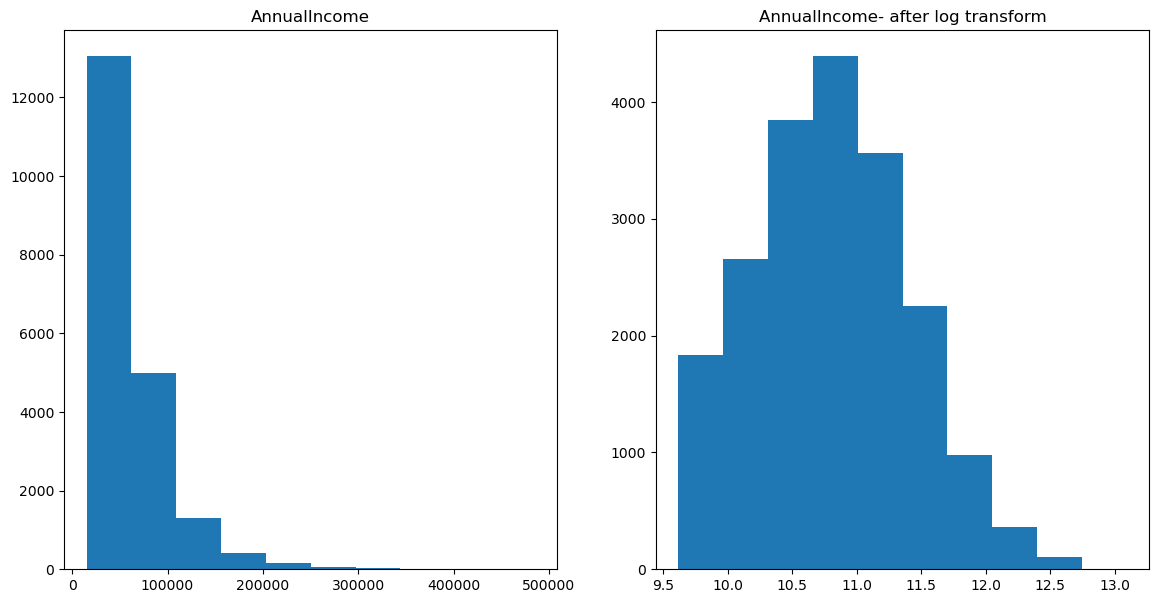

In [47]:
plt.figure(figsize=(14,7))
# 
ax1 = plt.subplot(1,2,1)
cp = plt.hist(df_copy['AnnualIncome'])
plt.title('AnnualIncome')

# 
ax2 = plt.subplot(1,2,2)
plt.hist(df['AnnualIncome'])
plt.title("AnnualIncome- after log transform")
plt.show()

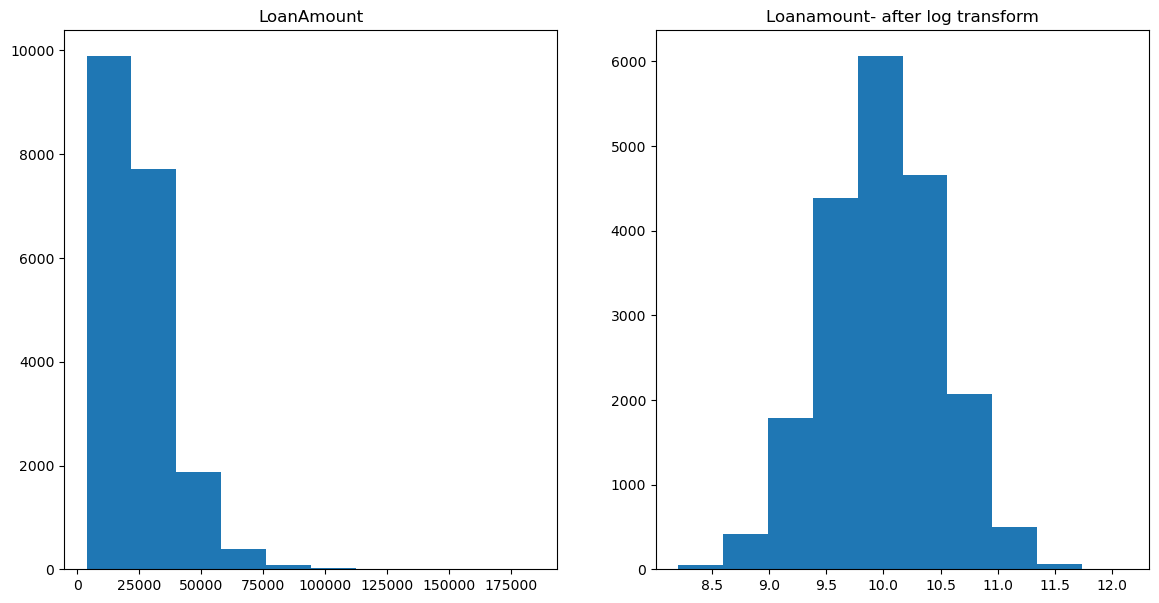

In [48]:
plt.figure(figsize=(14,7))
# 
ax1 = plt.subplot(1,2,1)
cp = plt.hist(df_copy['LoanAmount'])
plt.title('LoanAmount')

# 
ax2 = plt.subplot(1,2,2)
plt.hist(df['LoanAmount'])
plt.title("Loanamount- after log transform")
plt.show()

### log use in all features 

In [49]:
# step1: select numeric columns,excluding 'loanapproved'
numeric_columns = df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])

# step2: calculate skewness of numeric columns 
skewness = numeric_columns.skew()

# step3: identify columns with high skewness(threshold >1 or < -1)
highly_skewed_columns = skewness[abs(skewness) >1].index

# step4: apply log transformation using np.log1p() for columns with high skewness
for col in highly_skewed_columns:
    # craete a new column with log transformed value 
    df[col]=np.log1p(df[col])

## removing unwanted features

### based on correlation

* features with low correlation on the target variable 

<Axes: >

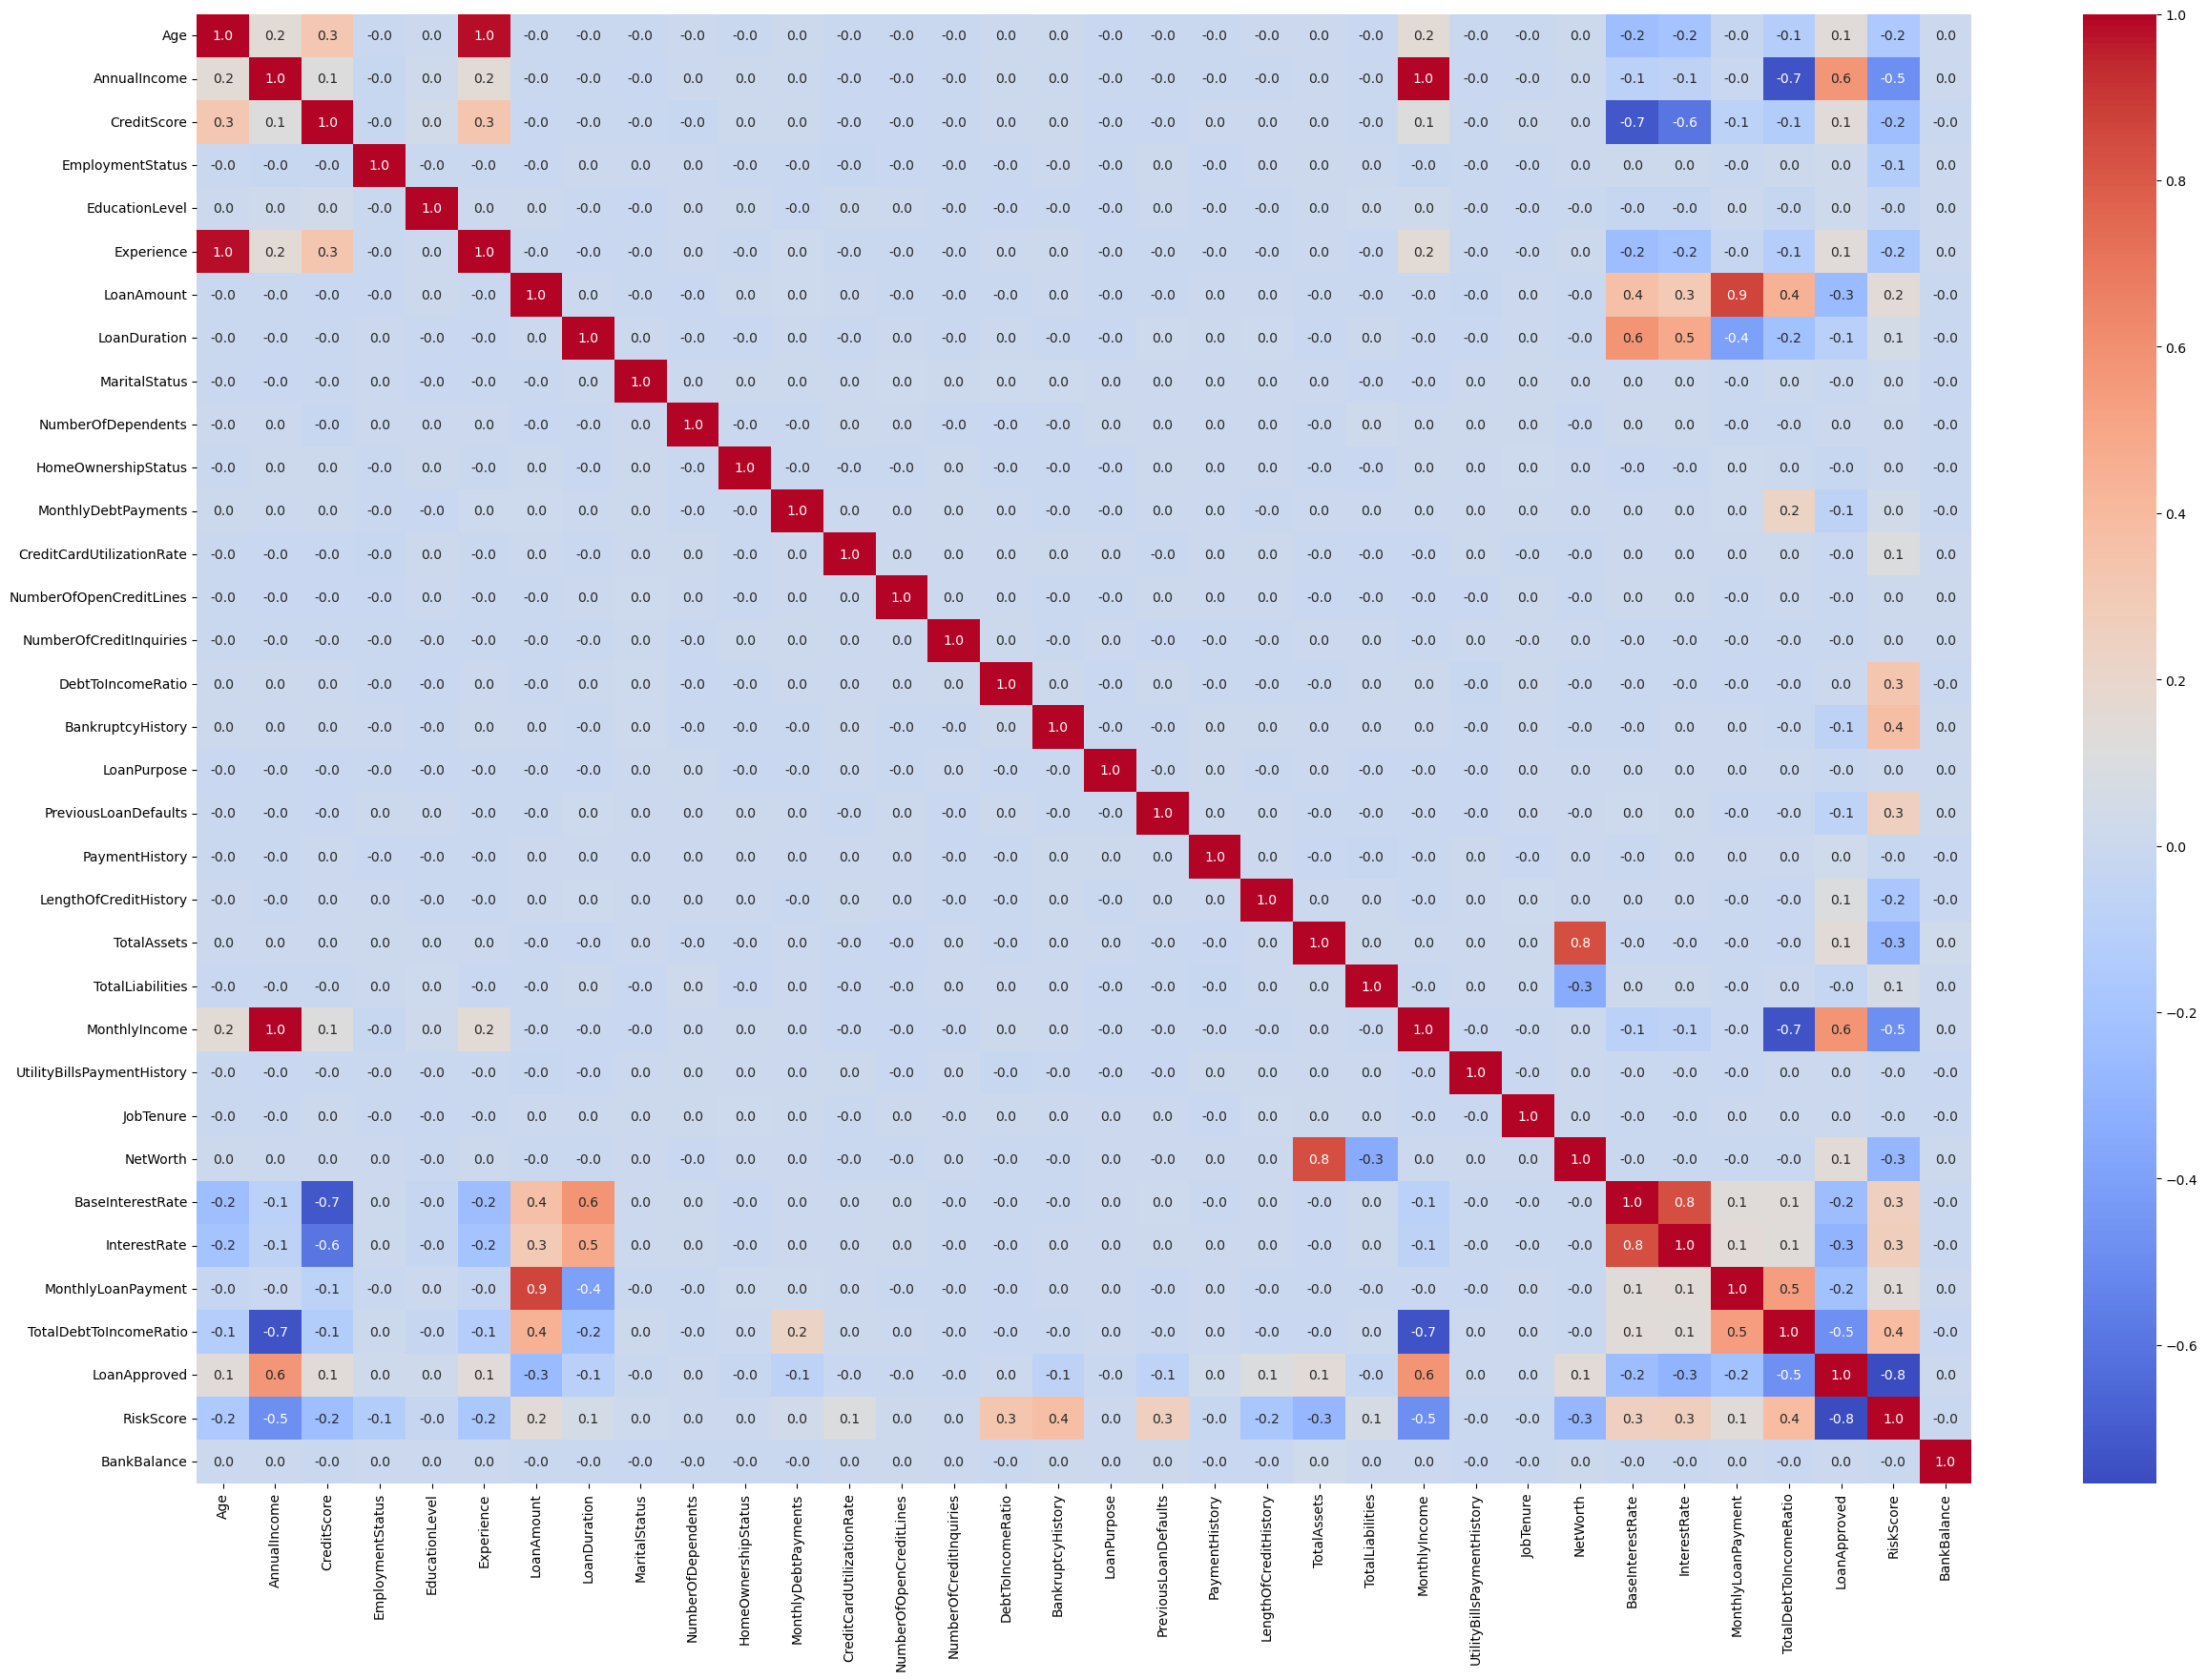

In [50]:
plt.figure(figsize=(30,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f')

In [51]:
df.corr()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
Age,1.000000,0.156663,0.323243,-0.002852,0.006059,0.982980,-0.005580,-0.006992,-0.005489,-0.000287,...,-0.005601,-0.000773,0.006656,-0.238995,-0.202702,-0.027758,-0.123050,0.141029,-0.164304,0.005178
AnnualIncome,0.156663,1.000000,0.117193,-0.015064,0.026074,0.158160,-0.005187,-0.001902,-0.008096,0.001024,...,-0.011695,-0.001671,0.003253,-0.087288,-0.075183,-0.010119,-0.733132,0.577045,-0.484203,0.005291
CreditScore,0.323243,0.117193,1.000000,-0.016420,0.038199,0.327664,-0.009231,-0.000762,-0.000507,-0.014453,...,-0.006838,0.008069,0.001043,-0.722619,-0.598844,-0.080825,-0.125033,0.142000,-0.240198,-0.005228
EmploymentStatus,-0.002852,-0.015064,-0.016420,1.000000,-0.003492,-0.002586,-0.010498,0.000028,0.002613,0.003093,...,-0.001483,-0.005920,0.005386,0.007858,0.007840,-0.006754,0.007624,0.024961,-0.130817,0.005587
EducationLevel,0.006059,0.026074,0.038199,-0.003492,1.000000,0.006311,0.007049,-0.006121,-0.008044,0.003881,...,-0.001862,-0.012137,-0.000460,-0.027464,-0.025250,0.004524,-0.021440,0.026609,-0.027031,0.004667
Experience,0.982980,0.158160,0.327664,-0.002586,0.006311,1.000000,-0.005393,-0.007924,-0.004426,0.000136,...,-0.006603,-0.000762,0.006633,-0.242871,-0.206252,-0.027939,-0.123991,0.140755,-0.166496,0.006080
LoanAmount,-0.005580,-0.005187,-0.009231,-0.010498,0.007049,-0.005393,1.000000,0.000126,-0.005475,-0.009104,...,-0.015043,0.001044,-0.002563,0.360816,0.302460,0.862680,0.444596,-0.259575,0.151177,-0.002476
LoanDuration,-0.006992,-0.001902,-0.000762,0.000028,-0.006121,-0.007924,0.000126,1.000000,0.003906,-0.001301,...,-0.010105,0.003635,-0.005524,0.579215,0.487994,-0.404565,-0.218800,-0.094558,0.054550,-0.006214
MaritalStatus,-0.005489,-0.008096,-0.000507,0.002613,-0.008044,-0.004426,-0.005475,0.003906,1.000000,0.000954,...,0.000731,0.006668,0.005394,0.002563,0.003604,-0.005142,0.008430,-0.006828,0.016824,-0.011145
NumberOfDependents,-0.000287,0.001024,-0.014453,0.003093,0.003881,0.000136,-0.009104,-0.001301,0.000954,1.000000,...,0.008735,0.010910,-0.009468,0.006977,0.006749,-0.005865,-0.002420,0.001717,0.001686,-0.002764


In [52]:
df[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()
# highly correlated

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [53]:
# drop 
df.drop('TotalDebtToIncomeRatio',axis=1,inplace=True)

In [54]:
correlation_matrix = df.corr()

# set the correlation threshold 
threshold = 0.5

# find pairs of features with high correlation 
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceds the threshold
        if abs(correlation_matrix.iloc[i,j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))



# print all pairs of highly correlated features
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


In [55]:
df.drop(['Experience','AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment'],axis=1,inplace=True)

## low correlated features with target

In [56]:
# step1: calculate the all correlation of each features with the target 
corr_with_tar = df.corr()['LoanApproved'].sort_values(ascending=False)

# step2: set the threshold for low correlation(-0.05 to 0.05)
low_corr_feat = corr_with_tar[(corr_with_tar >-0.05)& 
                              (corr_with_tar <0.05)]

# step3: print the low correlated features 
print('features with correlated between -0.05 & 0.05')
print(low_corr_feat)

features with correlated between -0.05 & 0.05
PaymentHistory                0.030804
EducationLevel                0.026609
EmploymentStatus              0.024961
JobTenure                     0.004997
BankBalance                   0.004973
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


In [57]:
# below features are very less correlated with target variable :
df.drop(['JobTenure','UtilityBillsPaymentHistory','NumberOfDependents','DebtToIncomeRatio','NumberOfCreditInquiries','MaritalStatus','LoanPurpose'],axis=1,inplace=True)

In [58]:
df.drop(['MonthlyDebtPayments','HomeOwnershipStatus','PaymentHistory','BankBalance'],axis=1,inplace=True)

In [59]:
df.drop(['LoanDuration','EducationLevel','Age'],axis=1,inplace=True)

## PCA

### PCA reduces the number of features(dimensions) in a dataset.
* principal components: these are the new features 

In [60]:
from sklearn.decomposition import PCA

# apply pca 
pca = PCA(n_components=5) # you can change the number of components to retain 
loan_pca = pca.fit_transform(df)

# create a dataframe with the pca result 
loan_pca_df = pd.DataFrame(loan_pca,
                           columns=[f'PC{i+1}'for i in range(loan_pca.shape[1])])

# now loan_pca_final_df contains the orginal data along with the pca components 
loan_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,45.415774,-5.118347,-3.173671,-2.005094,1.362998
1,56.294487,-6.875849,-0.182589,1.994517,0.851438
2,-1.650629,5.432358,4.697535,-1.032525,-2.105005
3,-26.719204,-5.348615,-0.666785,-1.032616,1.746805
4,22.940515,17.472624,-6.050573,-3.009141,1.253628


## scaling

In [61]:
# create a copy of the original data for comparison
scaled_df = df.copy()

# slect numeric columns, excluding "loanapproved"
numeric_columns = df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

# initialize the standardscaler 
scaler = StandardScaler()

# apply the scaler only to the numeric columns 
scaled_df[numeric_columns]=scaler.fit_transform(df[numeric_columns])
scaled_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,NumberOfOpenCreditLines,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.371144,-1.014008,0.425792,-1.165445,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,0.371144,0.343015,-1.242602,1.138546,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,0.371144,-0.432362,-0.932273,-0.589447,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.371144,1.087972,-0.117617,-0.589447,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,0.371144,-1.727221,0.213746,-1.741443,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515


## handling outliers

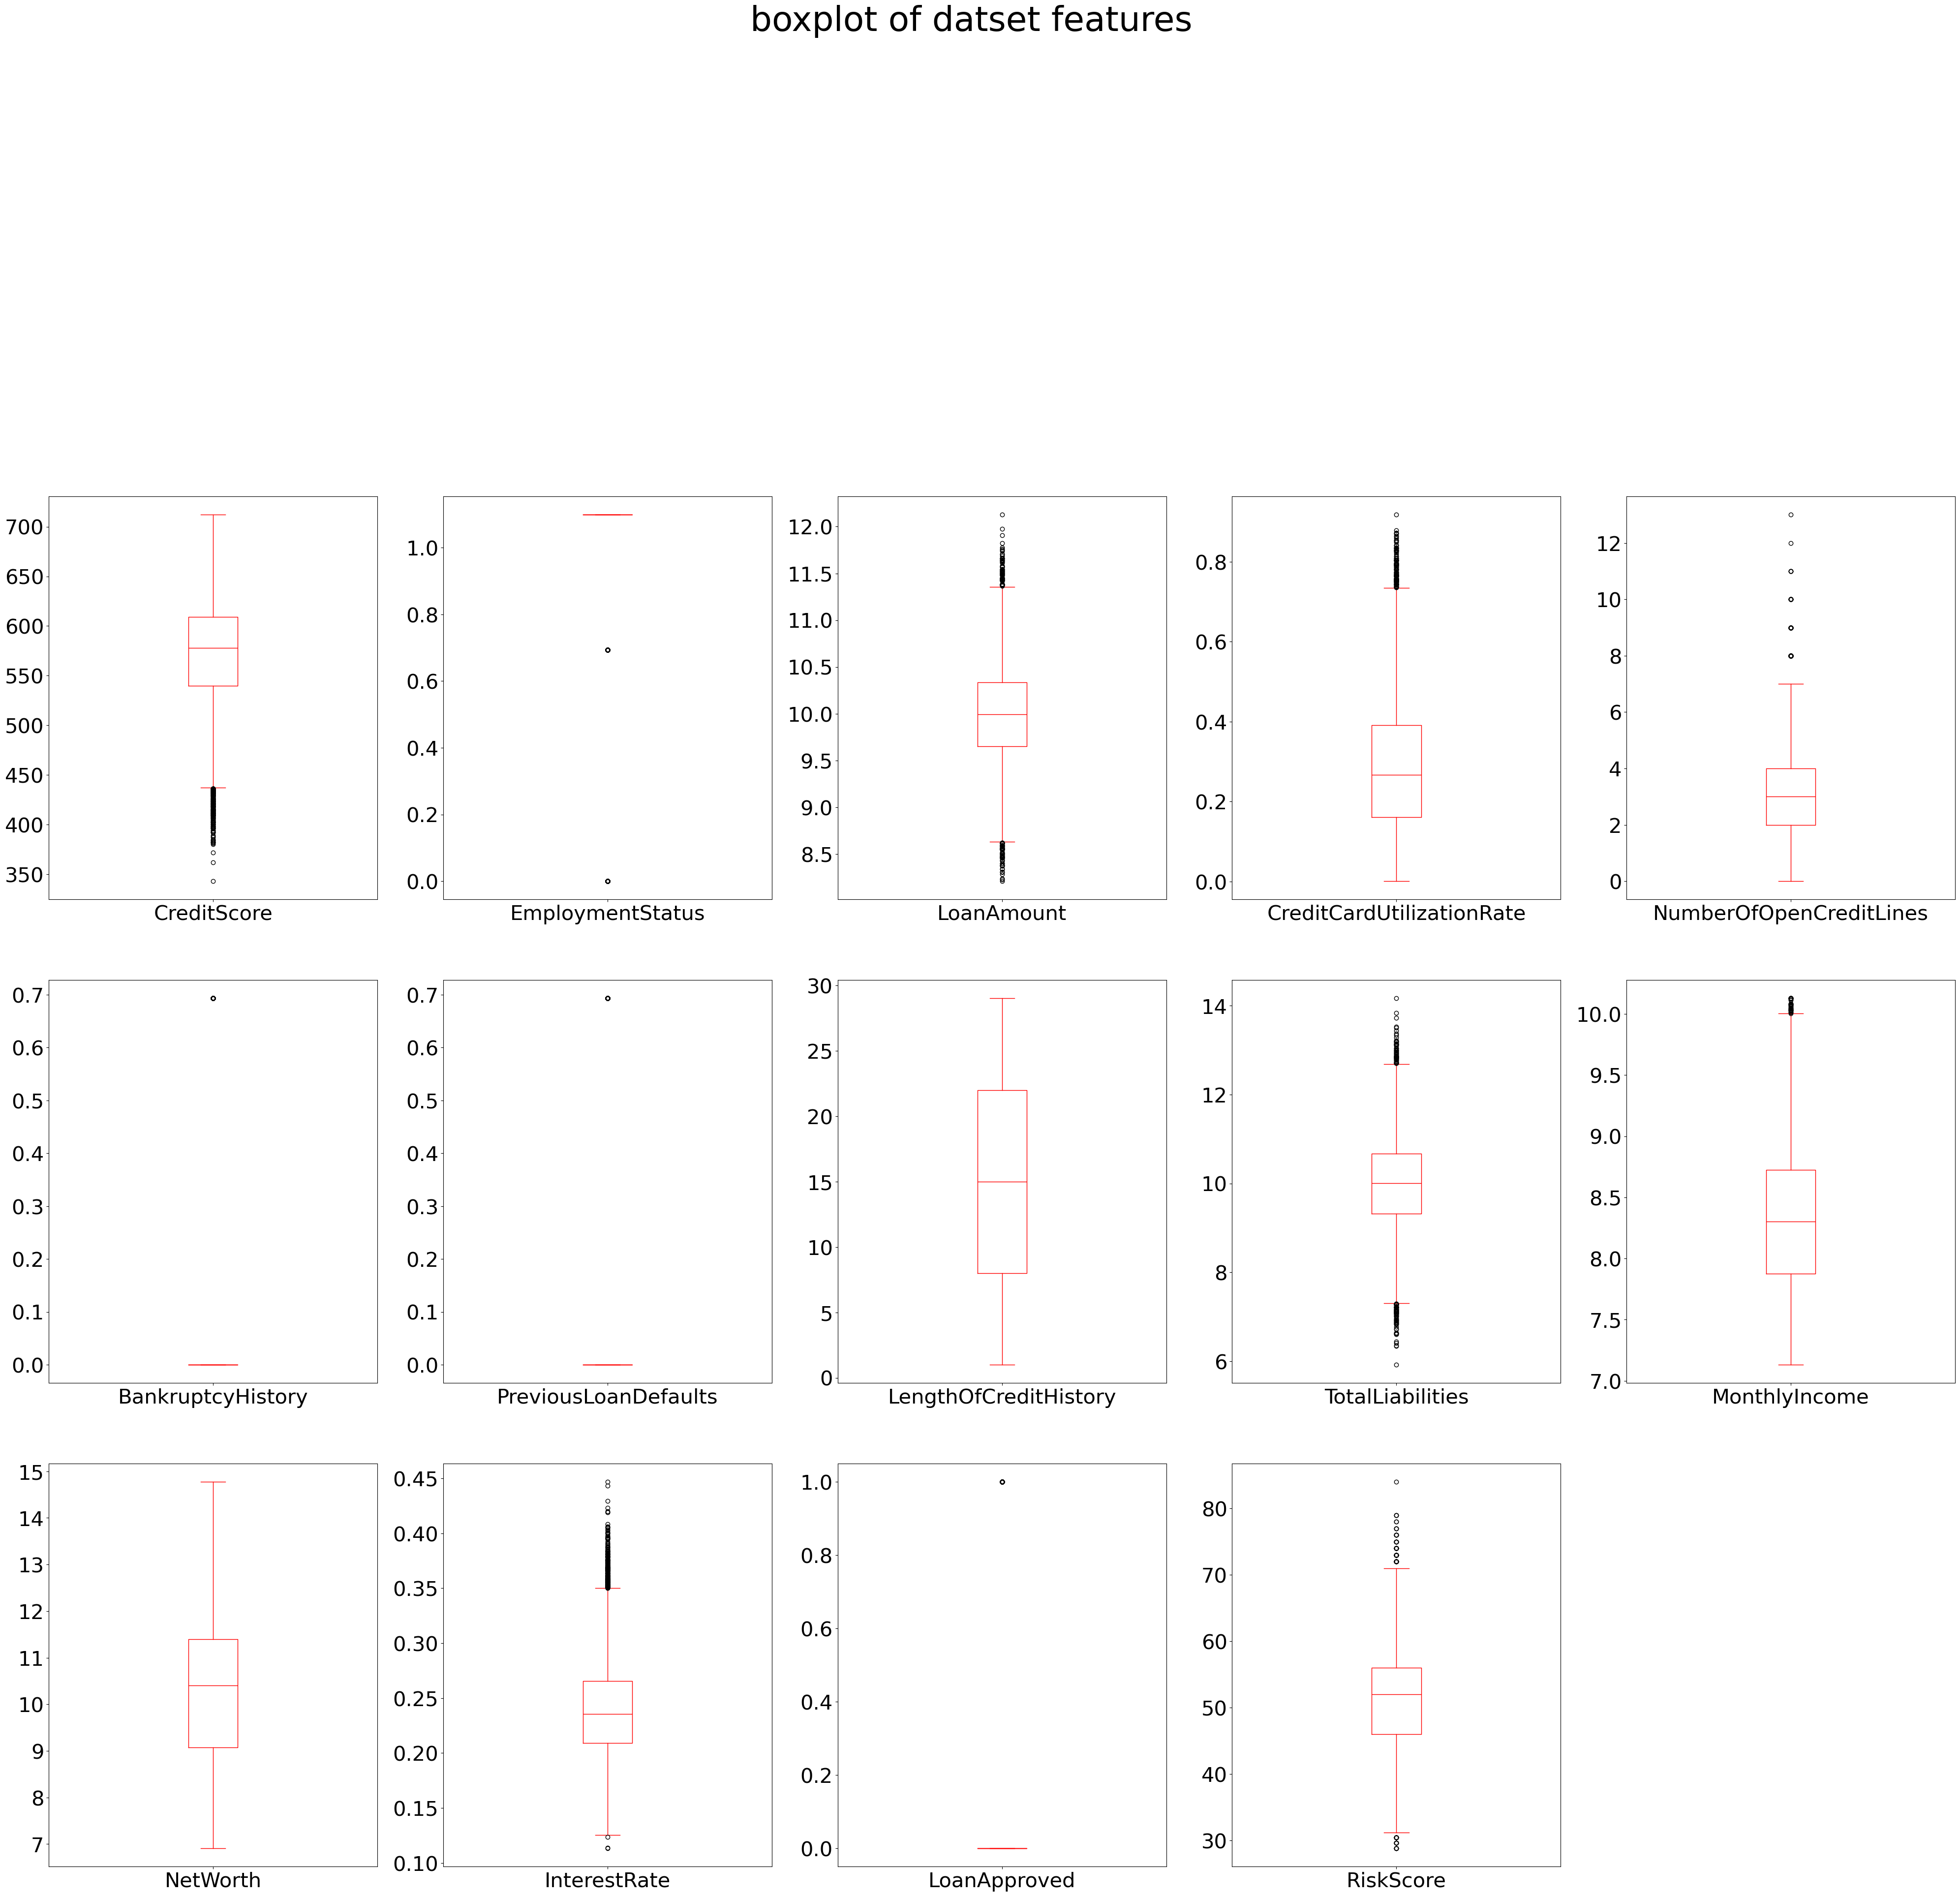

In [62]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='red',fontsize=30)
plt.suptitle('boxplot of datset features',fontsize=50)
plt.show()

In [63]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
# models 
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [66]:
# for classification algorithams 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
# from sklearn.utils import class_weight 
# from sklearn.model_selection import KFold 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [67]:
class_models = {'lr':LogisticRegression(max_iter=500),
'rfc': RandomForestClassifier(),
'dtc': DecisionTreeClassifier(),
'knm': KNeighborsClassifier(n_neighbors=11),
'svm': SVC(kernel='linear'),
'gbc': GradientBoostingClassifier(random_state=0,learning_rate=0.45),
'etc': ExtraTreesClassifier(),
'nb': GaussianNB()}

## model training and evalution

### classification modeling

binary loan approval classification to determine the binary outcome of loan approval indicating whether an applicant is likely to be approved or deined for a loan

In [68]:
# convert 'Loanapproved' from float to int 
df['LoanApproved']=df['LoanApproved'].astype(int)
x=df.drop(['LoanApproved','RiskScore'],axis=1)
y=df[['LoanApproved']]

In [69]:
df[['LoanApproved']].value_counts()

LoanApproved
0               15220
1                4780
Name: count, dtype: int64

In [70]:
# for evalution
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
print('Shape of Training Features:',x_train.shape)
print('Shape of Testing Features:',x_test.shape)
print('Shape of Training Target:',y_train.shape) 
print('Shape of Testing Target:',y_test.shape)

Shape of Training Features: (16000, 12)
Shape of Testing Features: (4000, 12)
Shape of Training Target: (16000, 1)
Shape of Testing Target: (4000, 1)


## regression modeling

In [72]:
models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor" : RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingClassifier(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
    #"mlp_regressor": Mlregressor(max_iter=500),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "BaggingRegressor": BaggingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    # "catboostregressor":catboostregressor(),
    "XGBRegressor": XGBRegressor()
}

In [73]:
x1 = scaled_df.drop('LoanApproved',axis=1)
y1 = scaled_df[['LoanApproved']]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=42,test_size=0.2)


In [74]:
# dictionary to store results 
results = {'model':[],'MSE':[],"MAE":[],'R2':[]}

# loop through the model train them and calculate the metrics 
for model_name,model in models.items():
    # train the model 
    model.fit(x1_train,y1_train)
    # make prediction 
    y1_pred = model.predict(x1_test)
    # calculate metrics 
    mse = mean_squared_error(y1_test,y1_pred)
    mae = mean_absolute_error(y1_test,y1_pred)
    r2 = r2_score(y1_test,y1_pred)  
    # store result in the dictionarey 
    results['model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

    #convert results to a dataframe 
    results_df = pd.DataFrame(results)
    results_df

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 13
[LightGBM] [Info] Start training from score 0.235187


## regression on scaled data 

In [75]:
x1s = scaled_df.drop(['RiskScore','LoanApproved'],axis=1)
y1s = scaled_df[['RiskScore']]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=42,test_size=0.2)
# dictionary to store results 
results = {'model':[],'MSE':[],"MAE":[],'R2':[]}

# loop through the model train them and calculate the metrics 
for model_name,model in models.items():
    # train the model 
    model.fit(x1_train,y1_train)
    # make prediction 
    y1_pred = model.predict(x1_test)
    # calculate metrics 
    mse = mean_squared_error(y1_test,y1_pred)
    mae = mean_absolute_error(y1_test,y1_pred)
    r2 = r2_score(y1_test,y1_pred)  
    # store result in the dictionarey 
    results['model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

    #convert results to a dataframe 
    results_df = pd.DataFrame(results)
    results_df

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 13
[LightGBM] [Info] Start training from score 0.235187


In [76]:
results_df = pd.DataFrame(results)
results_df2 = results_df.sort_values(by='MSE',ascending = False)
results_df.style.background_gradient('Blues')


,model,MSE,MAE,R2
0,Linear_Regression,0.044383,0.173756,0.765920
1,RandomForest_Regressor,0.004703,0.015185,0.975194
2,GradientBoosting_Regressor,0.003250,0.003250,0.982859
3,DecisionTree_Regressor,0.010500,0.010500,0.944622
4,SVM,0.014797,0.087014,0.921961
5,AdaBoostRegressor,0.029640,0.119777,0.843675
6,ExtraTreesRegressor,0.003525,0.015198,0.981410
7,BaggingRegressor,0.005725,0.015500,0.969806
8,LGBMRegressor,0.003269,0.015167,0.982759
9,XGBRegressor,0.003116,0.015708,0.983566


## final report

* based on the analysis of the loan approval dataset for predicting the (riskscore) the (gradientboostingregressor) model demonstrated the best performance among the test models 
* based on the evalution of the classification models for predicting (loan approval) the (gradientboostingclassifier) witha learning rate 0.45 and random state set to 0 emerged as the best performing model it archeived the highest accuracy and consistency strong result across precitionrecall,f1score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset 

In [77]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# dictionary to store results 
results = {'models':[], 'accuracy':[], 'precision':[], 'recall':[], 'f1_score':[]}

# evalute each model 
for model_name, model in class_models.items():
    # train the model 
    model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    
    # calculate metrics 
    accuracy = accuracy_score(y_test,model_pred)
    precision = precision_score(y_test,model_pred)
    recall = recall_score(y_test,model_pred)
    f1 = f1_score(y_test,model_pred)

    # store results in the dictionary 
    results['models'].append(model)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

In [78]:
# convert results to a dataframe 
results_df = pd.DataFrame(results)

# display the results in a table 
results_df

,models,accuracy,precision,recall,f1_score
0,LogisticRegression(max_iter=500),0.90550,0.849180,0.764012,0.804348
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.92950,0.899023,0.814159,0.854489
2,DecisionTreeClassifier(),0.88575,0.783401,0.761062,0.772070
3,KNeighborsClassifier(n_neighbors=11),0.75850,0.613333,0.135693,0.222222
4,SVC(kernel='linear'),0.92475,0.880851,0.814159,0.846193
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.93500,0.889804,0.849558,0.869215
6,"(ExtraTreeClassifier(random_state=872542129), ...",0.92100,0.910903,0.764012,0.831016
7,GaussianNB(),0.87950,0.754036,0.780728,0.767150


In [79]:
x2s = scaled_df.drop('LoanApproved',axis=1)
y2s = scaled_df[['LoanApproved']]
x2s_train,x2x_test,y2s_train,y2s_test = train_test_split(x2s,y2s,random_state=42,test_size=0.2)
 
# dictionary to store results 
results = {'Model':[],'Accuracy':[],'Precision':[], 'Recall':[], 'F1_Score':[]}

# evalute each model 
for model_name, model in class_models.items():

# train the model 
    model.fit(x2s_train,y2s_train)
    model_pred2 = model.predict(x2x_test)


 # calculate metrics 
    accuracy = accuracy_score(y2s_test,model_pred2)
    precision = precision_score(y2s_test,model_pred2)
    recall = recall_score(y2s_test,model_pred2)
    f1 = f1_score(y2s_test,model_pred2) 


 # store results in the dictionary 
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1_Score'].append(f1)

# convert results to a dataframe 
results_df2 = pd.DataFrame(results)

# sort by accuracy 
results_df2 = results_df2.sort_values(by='Accuracy',ascending = False)

# dispaly the sorted dataframe with background gradient
results_df2.style.background_gradient('Blues')

c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

,Model,Accuracy,Precision,Recall,F1_Score
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.999250,0.998035,0.999017,0.998526
0,LogisticRegression(max_iter=500),0.996500,0.995064,0.991150,0.993103
4,SVC(kernel='linear'),0.996500,0.995064,0.991150,0.993103
6,ExtraTreesClassifier(),0.995500,0.997015,0.985251,0.991098
1,RandomForestClassifier(),0.992000,0.990050,0.978368,0.984174
2,DecisionTreeClassifier(),0.990000,0.984143,0.976401,0.980257
3,KNeighborsClassifier(n_neighbors=11),0.983500,0.994797,0.940020,0.966633
7,GaussianNB(),0.957750,0.913255,0.921337,0.917279
